<a href="https://colab.research.google.com/github/VastavBhagat/Book-Recommended-System/blob/main/Twitter_Sentiment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('twitter_training.csv', header=None)
data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
# in the above dataset there are no columns name contain, assigning column name manually

data.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweets']

In [5]:
# 'Tweet ID' & 'Entity' not required for sentiment analysis, so will remove it

data.drop(columns=['Tweet ID', 'Entity'], inplace=True)

In [6]:
data.isnull().sum()

Sentiment      0
Tweets       686
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated().sum()

4227

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data['Sentiment'].value_counts()

Negative      21237
Positive      19138
Neutral       17110
Irrelevant    12284
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

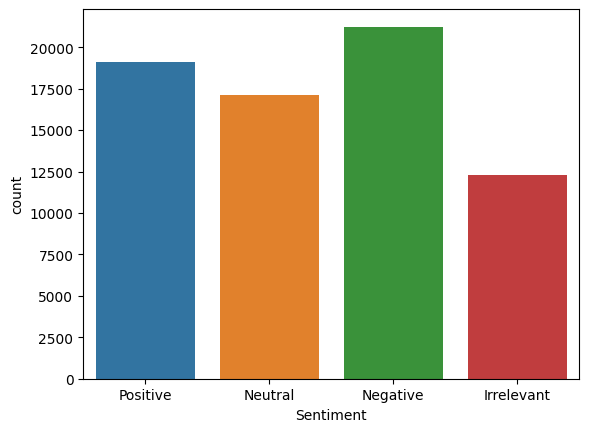

In [11]:
sns.countplot(data=data, x=data['Sentiment'])

In [12]:
import nltk

In [13]:
# Normalization

data['Tweets'] = data['Tweets'].str.lower()

In [14]:
# remove puctuations, html tags and URLs

import re

# puctuations
def rem_puct (text):
    cleaned_tweet = re.sub(r'[^\w\s]', '', text)
    return(cleaned_tweet)

# html tags
def rem_html (text_htm):
    cleaned_tweet = re.sub(r'<.*?>', '', text_htm)
    return(cleaned_tweet)


# URLS
def rem_url (text):
    cleaned_tweet = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return(cleaned_tweet)

In [15]:
data['cleaned_tweet'] = data['Tweets'].apply(rem_puct).apply(rem_html).apply(rem_url)

In [16]:
data.sample(10)

,Sentiment,Tweets,cleaned_tweet
70895,Positive,i just wait!!,i just wait
48541,Negative,"i wish i could go to home depot to buy shit, t...",i wish i could go to home depot to buy shit to...
48600,Negative,man fuck home depot,man fuck home depot
567,Irrelevant,"rhandlerr my homage to a friend, a warrior of ...",rhandlerr my homage to a friend a warrior of b...
58958,Neutral,"we are the wtf generation.... whatsapp, twitte...",we are the wtf generation whatsapp twitter and...
896,Neutral,burn aall the bies.,burn aall the bies
51539,Positive,i have worn red dead one one and two multiple ...,i have worn red dead one one and two multiple ...
56208,Negative,@rainbow6game bruh why after the update did my...,rainbow6game bruh why after the update did my ...
14396,Neutral,i honestly don't know where @ benchat has such...,i honestly dont know where benchat has such t...
53204,Irrelevant,"it didn't work out that ""the ghost of tsushima...",it didnt work out that the ghost of tsushima i...


In [17]:
# Tokenization

from nltk.tokenize import word_tokenize, sent_tokenize

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# sentence tokenization

data['tweet_sentences'] = data['cleaned_tweet'].apply(sent_tokenize)

In [20]:
# word tokenization

data['tweet_words'] = data['cleaned_tweet'].apply(lambda x: word_tokenize(x))


In [21]:
# stopwords remove

from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

def rem_sw(text):
    cleaned = [word for word in text if word not in stop_words]
    return(cleaned)

In [23]:
data['tweet_words'] = data['tweet_words'].apply(lambda x: rem_sw(x))

In [24]:
# lemmatization and stemming
# lemmatization gives more accuracy for root words
# in a steaming time is faster


from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

lem = WordNetLemmatizer()
stem = PorterStemmer()

# steamming
"""def stem_word(clean_word):
    return [stem.stem(word) for word in clean_word]"""

# lemmatization
def lem_word(clean_word):
    return [lem.lemmatize(word, pos='v') for word in clean_word]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
data['tweet_words'] = data['tweet_words'].apply(lambda x: lem_word(x))

In [26]:
data['tweet_words'] = data['tweet_words'].apply(lambda x: ' '.join(x))

In [27]:
data['tweet_words_counts'] = data['tweet_words'].apply(lambda x:len(x))

In [28]:
data.sample(10)

,Sentiment,Tweets,cleaned_tweet,tweet_sentences,tweet_words,tweet_words_counts
21302,Positive,ok i know i said i was the best at hebdo but t...,ok i know i said i was the best at hebdo but t...,[ok i know i said i was the best at hebdo but ...,ok know say best hebdo trust time show,38
53328,Positive,2nd time playing through red dead redemption 2...,2nd time playing through red dead redemption 2...,[2nd time playing through red dead redemption ...,2nd time play red dead redemption 2 instead sa...,134
35226,Negative,my microsoft office finally expired...rip for ...,my microsoft office finally expiredrip for life,[my microsoft office finally expiredrip for life],microsoft office finally expiredrip life,40
66183,Negative,"talc is cancerous. not figuratively, but liter...",talc is cancerous not figuratively but literal...,[talc is cancerous not figuratively but litera...,talc cancerous figuratively literally cause na...,70
16381,Neutral,"this is cool, i asked my nephew if he wanted t...",this is cool i asked my nephew if he wanted to...,[this is cool i asked my nephew if he wanted t...,cool ask nephew want read dr seuss say aunt pl...,145
70141,Irrelevant,"professionals with a big ""p."" no peeing here, ...",professionals with a big p no peeing here or m...,[professionals with a big p no peeing here or ...,professionals big p pee name gazuntite bon app...,50
50215,Irrelevant,"hahahah, if you hit someone on fifa and they k...",hahahah if you hit someone on fifa and they ke...,[hahahah if you hit someone on fifa and they k...,hahahah hit someone fifa keep stop wait 30 sec...,76
28156,Negative,the fuck you @apexlegends,the fuck you apexlegends,[the fuck you apexlegends],fuck apexlegends,16
11870,Negative,@ n2k _ myteam 2k do swith your game coz we al...,n2k _ myteam 2k do swith your game coz we all...,[ n2k _ myteam 2k do swith your game coz we al...,n2k _ myteam 2k swith game coz frustrate,40
21040,Positive,"3 well, that was easy..",3 well that was easy,[3 well that was easy],3 well easy,11


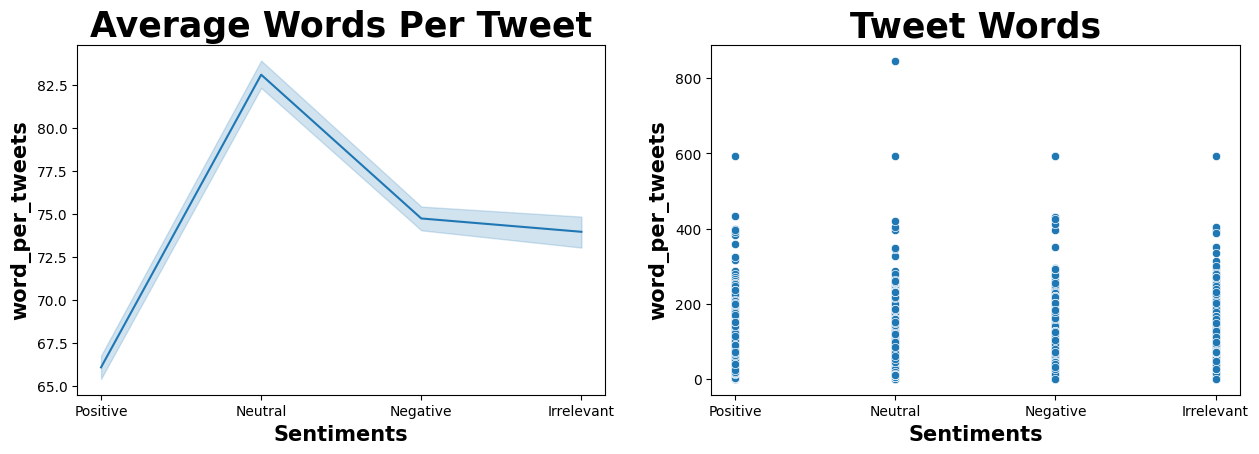

In [29]:
# average english words used in tweets

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(data=data, x=data['Sentiment'], y=data['tweet_words_counts'], legend ="full")
plt.xlabel('Sentiments',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('word_per_tweets',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Average Words Per Tweet',fontdict={'fontsize': 25, 'fontweight': 'bold'})

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['Sentiment'], y=data['tweet_words_counts'])
plt.xlabel('Sentiments',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('word_per_tweets',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Tweet Words',fontdict={'fontsize': 25, 'fontweight': 'bold'})

plt.show()

In [30]:
X = data['tweet_words']
y = data['Sentiment']

In [31]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=25)

In [32]:
Xtest

72143               ubisoft love official terminator event
26887    look like even ign report wrong next time yout...
29484    make new apex legends account get 22 kill firs...
15420    say hello sasha hostyn aka scarlett current hi...
71577                                    nothing see folks
                               ...                        
57004    rainbow6game win national grand larceny fence ...
60877                                    im rubbish im fun
42738    ptaofficialpk pubg source income many youngste...
56531    watch trailer sooooo loud already still give i...
4278                                           dont please
Name: tweet_words, Length: 13954, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000)

In [34]:
Xtrain = vector.fit_transform(Xtrain)
Xtest = vector.fit_transform(Xtest)

In [35]:
Xtrain.shape

(55815, 5000)

In [36]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [37]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [38]:
gnb.fit(Xtrain, ytrain)

GaussianNB()

In [39]:
ypred1 = gnb.predict(Xtest)

In [40]:
ypred1

array(['Positive', 'Irrelevant', 'Negative', ..., 'Neutral', 'Negative',
       'Positive'], dtype='<U10')

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [42]:
print('accuracy_score ',accuracy_score(ytest, ypred1))
print('precision_score',precision_score(ytest, ypred1, average='weighted'))
print('recall_score', recall_score(ytest, ypred1, average='weighted'))
print('f1_score', f1_score(ytest, ypred1, average='weighted'))

accuracy_score  0.24623763795327505
precision_score 0.25732361964878214
recall_score 0.24623763795327505
f1_score 0.24646963441617675


In [43]:
confusion_matrix(ytest, ypred1)

array([[ 564,  659,  813,  454],
       [ 887, 1027, 1542,  767],
       [ 798,  896, 1101,  647],
       [ 985,  849, 1221,  744]])

In [45]:
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [46]:
ypred2 = mnb.predict(Xtest)

In [47]:
ypred2

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Neutral'], dtype='<U10')

In [48]:
print('accuracy_score ',accuracy_score(ytest, ypred2))
print('precision_score',precision_score(ytest, ypred2, average='weighted'))
print('recall_score', recall_score(ytest, ypred2, average='weighted'))
print('f1_score', f1_score(ytest, ypred2, average='weighted'))

accuracy_score  0.25089580048731547
precision_score 0.2562103985569192
recall_score 0.25089580048731547
f1_score 0.24652008702372719
